# Домашнее задание 1 (NumPy, Pandas, Matplotlib)

## Общая информация
**Дата выдачи**: 02.02.2019

**Срок сдачи**: 23:59 16.02.2019

**О задании**

Домашнее задание №1 ориентировано на более тесное знакомство с модулями NumPy, Pandas и Matplotlib путём решения набора задач. Целью задания является редактирование данного ipython notebook'a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

**Оценивание и штрафы**

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи), оценка за задание выставляется следующим образом:
Оценка за задание = Сумма баллов за решенные задачи/3

Таким образом, максимально допустимая оценка за задание — 10 баллов.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.5 балла в день, но получить отрицательное число баллов нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить задание на указанных в ответном письме условиях.

Задание выполняется **САМОСТОЯТЕЛЬНО**. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.


## NumPy

При решении задач запрещено использовать циклы. Обратите внимание на функции и методы np.max, np.min, np.arange, np.hstack, np.roll, np.random.uniform, np.random.rand, np.newaxis.

In [16]:
import numpy as np

#### 1. (1 балл) Написать функцию, которая принимает на вход два целочисленных массива одинаковой длины, и возвращает минимальный и максимальный из тех элементов этих двух массивов у которых совпадает и позиция и значение (то есть из всех элементов $\{a[i]: a[i] = b[i]\}$)

    Например, для a = np.array([4, 2, 6, 3]) и b = np.array([4, 3, 6, -3]) ответом является кортеж (4, 6).

In [62]:
def minMaxEqual(a, b):
    return a[a == b].min(), a[a == b].max()

In [63]:
minMaxEqual(np.array([4, 2, 6, 3]), np.array([4, 3, 6, -3]))

(4, 8)

#### 2. (2 балла) Дан numpy-вектор v длины n+1, который задает полином степени n. Найти вторую производную этого полинома (Например np.array([3, 0, 7, 1]) соответствует полиному 3+7x^2+x^3)

    Для вектора из примера функция должна будет выдавать np.array([14, 6])

In [38]:
def second_derivative(v):
    return v[2:] * np.arange(2, v.shape[0]) * np.arange(1, v.shape[0] - 1)

In [39]:
second_derivative(np.array([3, 0, 7, 1]))

array([14,  6])

#### 3. (1 балл) Дана матрица X и два вектора одинаковой длины i и j. Написать функцию, которая возвращает вектор np.array, состоящий из последовательности элементов $[X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]]$. 

In [77]:
def constructArray(X, i, j):
    h = X.shape[0]
    X = X.ravel()
    return X[i * h + j]

In [78]:
constructArray(np.array([[1, 6, 3],[10, 1, 7],[8, 2, 17]]), np.array([0, 1, 0, 2]), np.array([1, 2, 2, 0]))

array([6, 7, 3, 8])

#### 4. (2 балла) Написать функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.

    Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5.

In [103]:
def prevZeroMax(x):
    ind = np.arange(x.shape[0])[x == 0] + 1
    ind[ind < x.shape[0]]
    return x[ind[ind < x.shape[0]]].max()

In [104]:
prevZeroMax(np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]))

5

#### 5. (2 балла) Напишите функцию, которая принимает параметры lims: ndarray размера 2, k: float, b: float, n: int, noise_level: float и возвращает выборку из n объектов, сгенерированную по правилу y = kx + b + U[-noise_level; noise_level]. x генерируется равномерно из U[lims[0]; lims[1]] (U[a, b] — равномерное распределение на [a, b]). Функция должна возвращать кортеж, первым элементом которого будет массив x, и вторым элементом массив y — значения функции в точках этого массива.

In [127]:
def gen_data(lims, k, b, n, noise_level):
    x = np.random.uniform(lims[0], lims[1], n)
    y = k * x + b + np.random.uniform(-noise_level, noise_level, n)
    return x, y

In [128]:
gen_data(np.array([-1, 1]), 2.34, 1.2, 15, 0.6754)

(array([ 0.07361741,  0.669305  , -0.74190091, -0.47446691,  0.57849789,
        -0.54712076, -0.32998794,  0.81899244,  0.00392788, -0.45174976,
         0.86982906,  0.0703942 , -0.34046224, -0.72638159,  0.02615727]),
 array([ 1.36173348,  2.15768071, -0.59434647,  0.62615872,  3.13302051,
        -0.3719681 ,  0.72793858,  3.46988774,  1.72708546,  0.64872722,
         2.71414388,  1.48079326,  0.80147407,  0.00483851,  0.65214098]))

#### 6. (2 балла) Напишите функцию, которая вычисляет следующее матричное произведение: $x * x.T + a * I + b$. Здесь x и b — массивы np.array размерности N (одномерные, считаются вектор-столбцом). a — число, I — матрица, состоящая единиц на главной диагонали и нулей в остальных местах (единичная матрица). Сложение вектора b с матрицей x * x.T должно осуществляться по столбцам (вектор b должен прибавиться к каждому столбцу матрицы независимо).

    Например, для x = np.array([[1],[2],[3]]), b = np.array([[0], [-2], [1]]), a = 4.5 функция должна выдавать 
    np.array([[5.5, 2.0, 3.0], [0.0, 6.5, 4.0], [4.0, 7.0, 14.5]])
$x*x.T$ - матричное произведение

In [68]:
def calc_value(x, b, a):
    N = x.shape[0]
    ans = x * x.transpose() + a * np.identity(N) + b
    return ans

In [69]:
calc_value(np.array([[1],[2],[3]]), np.array([[0], [-2], [1]]), 4.5)

array([[ 5.5,  2. ,  3. ],
       [ 0. ,  6.5,  4. ],
       [ 4. ,  7. , 14.5]])

## Pandas


Вам предстоит ответить на ряд вопросов о пассажирах Титаника.

Данные: http://www.machinelearning.ru/wiki/images/3/32/Titanic.zip

Описание датасета: https://www.kaggle.com/c/titanic/data

Обратите внимание на функции и методы pd.read_csv, pd.DataFrame{ .head, .shape, .groupby, .fillna }, pd.Series{ .min, .max, .mean, .shape, .std, .corr }

In [2]:
import pandas as pd

#### 0. (0.5 балла) Загрузите данные в DataFrame и выведите его. Также напечатайте количество объектов и количество признаков (используйте функцию print):

In [3]:
df = pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
print('Количество объектов:', df.shape[0])
print('Количество признаков:', df.shape[1])

Количество объектов: 891
Количество признаков: 12


#### 1. (0.5 балла) Какие встречаются типы признаков? Придумайте постановку трех задач, которые можно решать, используя полученные данные: классификации, регрессии и кластеризации.

In [2]:
# Признаки
__Бинарные признаки:__ выжил ли пассажир, пол.

__Категориальные:__ полное имя, палуба, порт посадки.

__Вещественные:__ возраст, количество сиблингов и супругов на борту, количество родителей и детей на борту, стоимость билета.

__Порядковые:__ класс каюты.

# Задачи
__Задача классификации:__ предсказание выбора класса каюты пассажиром.

__Задача регрессии:__ предсказание стоимости билета.

__Задача кластеризации:__ распределение пассажиров по социальным группам.

SyntaxError: invalid syntax (<ipython-input-2-62fc53b49bcb>, line 2)

#### 2. (0.5 балла) Сохраните в переменную firstclass_num количество пассажиров, которые ехали первым классом, и выведите ее с помощью функции print().

In [72]:
pclass = df['Pclass'].value_counts()
firstclass_num = pclass[1]
print(firstclass_num)

216


#### 3. (0.5 балла) Выведите минимальный, максимальный и средний возраст пассажиров.

In [45]:
print('Минимальный возраст:', df['Age'].min())
print('Максимальный возраст:', df['Age'].max())
print('Средний возраст:', df['Age'].mean())

Минимальный возраст: 0.42
Максимальный возраст: 80.0
Средний возраст: 29.69911764705882


#### 4. (1 балл) Напечатайте стандартное отклонение цены билетов на Титаник

In [46]:
print(df['Fare'].std())

49.693428597180905


#### 5. (1 балл) Посчитайте коэффициент корреляции ценой на билет и возрастом пассажиров.

In [49]:
print(df['Fare'].corr(df['Age']))

0.09606669176903888


#### 6. (2 балла) Создайте DataFrame в котором будет находиться средний возраст выживших пассажиров по каждому классу. Ваш код должен быть масштабируемым (то есть, должен работать при добавлении новых классов к исходному DataFrame'у).

In [109]:
df_age = df[df['Survived'] == 1].groupby(['Pclass'])
df_age['Age'].mean()

Pclass
1    34.784615
2    26.076166
3    23.232689
Name: Age, dtype: float64

#### 7. (2 балла) Посчитайте какой части пассажиров удалось выжить. Посчитайте отношение количества выживших мужчин к количеству выживших женщинам.

In [168]:
survived = df['Survived'].value_counts()
print('Доля выживших:', survived[1] / survived.sum())

Доля выживших: 0.3838383838383838


In [12]:
m_surv = sum(df[df['Sex'] == 'male']['Survived'])
f_surv = sum(df[df['Sex'] == 'female']['Survived'])
print('Отношение количества выживших мужчин к количеству ' +
      'выживших женщин:', m_surv / f_surv)

Отношение количества выживших мужчин к количеству выживших женщин: 0.4678111587982833


#### 8. (1 балл) Верно ли, что чаще выживали пассажиры с более дорогими билетами? Кратко опишите в комментариях к коду, какие величины вы хотите посчитать, чтобы ответить на этот вопрос.

In [96]:
# найдём среднюю цену билета с помощью .mean()
# посчитаем долю выживших с ценой, ниже средней, и выше

m_fare = df['Fare'].mean()
rich = df[df['Fare'] >= m_fare].count()
rich_all = rich[1]
rich_surv = sum(df[df['Fare'] >= m_fare]['Survived'])

poor = df[df['Fare'] < m_fare].count()
poor_all = poor[1]
poor_surv = sum(df[df['Fare'] < m_fare]['Survived'])
print('Доля выживших среди богатых:', rich_surv / rich_all) 
print('Доля выживших среди бедных:', poor_surv / poor_all)

Доля выживших среди богатых: 0.5971563981042654
Доля выживших среди бедных: 0.3176470588235294


#### 9. (1 балл) Замените все NaN в колонке Age на средние значения возраста по всем пассажирам.

In [18]:
mn = df['Age'].mean()
df['Age'].fillna(0)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


## Matplotlib

Обратите внимание, что за отсутствие названий графиков и подписей к осям могут снижаться баллы! Вообще, все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понятно было, что на них изображено.

Обратите внимание на функции и методы plt.plot, plt.scatter, plt.legend, plt.title, plt.xlabel, plt.ylabel, plt.fill_between

In [ ]:
import matplotlib.pyplot as plt

#### 1. (3 балла) Используя функцию из задания №5 по numpy (gen_data), отобразите на графике сгенерированную выборку, а также настоящую прямую из которой выборка была получена. Добавьте на этот график прямую, которая приближает выборку, обучив для этого простейшую линейную регрессию. Чтобы получить параметры данной прямой, можно выполнить следующий код:

        from sklearn.linear_model import LinearRegression as LR

        data_x, data_y = gen_data(...)
        regr = LR()
        regr.fit(data_x, data_y)
        k_learned, b_learned = regr.coef_, regr.intercept_
        

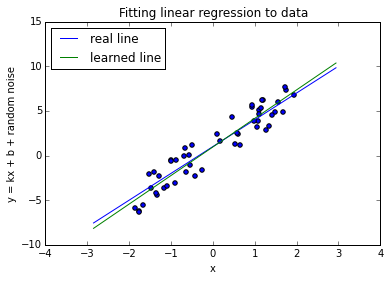

In [4]:
# В итоге ваш график должен получиться примерно таким:

In [36]:
from sklearn.linear_model import LinearRegression as LR

In [145]:
def lr_to_data(lims, k, b, n, noise_level):
    data_x, data_y = gen_data(lims, k, b, n, noise_level)
    plt.scatter(data_x, data_y)
    res = lims * k + b
    p_or = plt.plot(lims, res, color='blue', label='real line')
    
    regr = LR()
    regr.fit(data_x.reshape(-1, 1), data_y.reshape(-1, 1))
    x_test = lims
    y_test = regr.coef_[0] * x_test + regr.intercept_
    p_l = plt.plot(x_test, y_test, color='red', label='learned line')
    plt.legend()

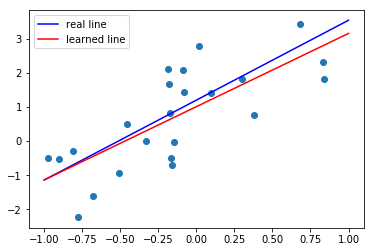

In [146]:
lr_to_data(np.array([-1, 1]), 2.34, 1.2, 23, 1.6754)

#### 2. (2 балла) Проверьте визуально полученную при выполнении задания №5 по pandas информацию о корреляции между ценой на билет и возрастом пассажира. Для этого предлагается отобразить все данные, откладывая на одной оси возраст пассажира, а на другой цену билета. Каждая точка должна быть визуально оботражена в виде треугольника зеленого цвета, направленного вниз. Сделайте возможность регулировать величину маркера (например, пусть она передается в качестве параметра в функцию, которая рисует график). Обратите внимание на параметры "marker", "s" и "c" функции plt.scatter.

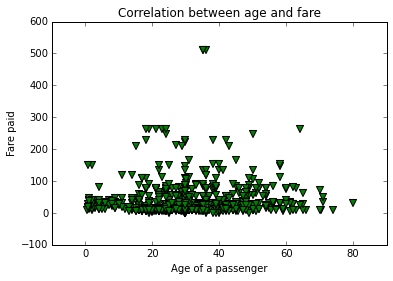

In [5]:
# В итоге ваш график должен получиться примерно таким:

In [50]:
def sh_corr(s):
    x = df['Age']
    y = df['Fare']
    plt.scatter(x, y, s, c='green', marker='v', edgecolors='black')
    plt.xlabel('Age of a passenger')
    plt.ylabel('Fare paid')
    plt.title('Correlation between age and fare')
    plt.show()

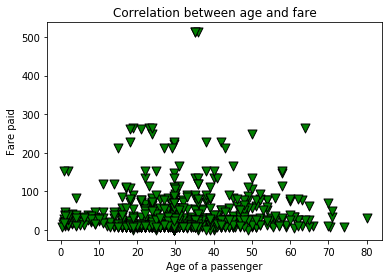

In [51]:
sh_corr(81)

#### 3. (3 балла) Отобразите гистограмму распределения возрастов для каждого класса пассажиров (здесь опять нужно использовать данные из заданий по pandas). В результате вы должны получить три гистограммы, которые необходимо отобразить рядом друг с другом используя функцию plt.subplots. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры figsize, sharey, sharex функции plt.subplots. Также полезными могут оказаться параметры bins, normed функции plt.hist

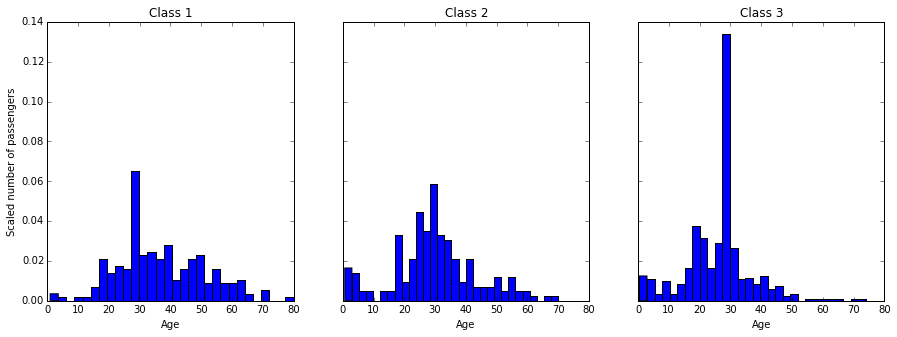

In [6]:
# В итоге ваш график должен получиться примерно таким:

Text(0.5,0,'Age')

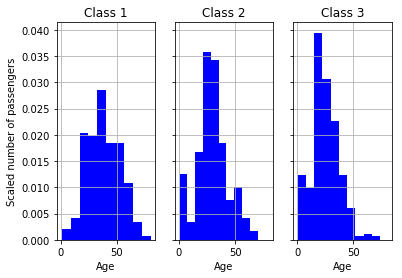

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)

df[df['Pclass'] == 1]['Age'].hist(density=1, color='blue', ax=ax1)
ax1.set_title('Class 1')
ax1.set_xlabel('Age')
ax1.set_ylabel('Scaled number of passengers')

df[df['Pclass'] == 2]['Age'].hist(density=1, color='blue', ax=ax2)
ax2.set_title('Class 2')
ax2.set_xlabel('Age')

df[df['Pclass'] == 3]['Age'].hist(density=1, color='blue', ax=ax3)
ax3.set_title('Class 3')
ax3.set_xlabel('Age')

#### 4. (2 балла) Используя следующую функцию для генерации выборки, отобразите на графике синим цветом функцию y(x), а также ее доверительный интервал в виде закрашенной зеленым цветом области от y[i] - error[i] до y[i] + error[i].

        def gen_uncertain_data():
            x = np.linspace(0, 30, 100)
            y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
            error = np.random.normal(0.1, 0.02, size=y.shape)
            return x, y, error


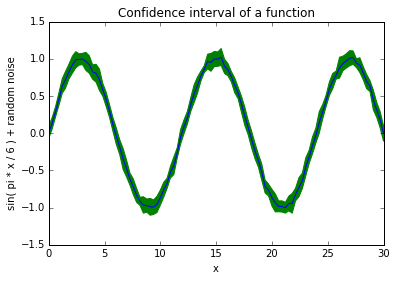

In [7]:
# В итоге ваш график должен получиться примерно таким:

In [78]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

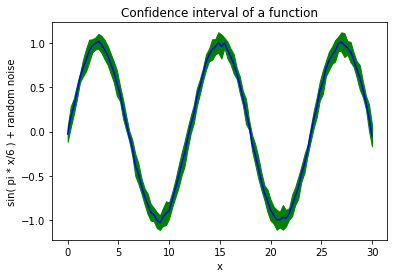

In [90]:
x, y, error = gen_uncertain_data()
plt.plot(x, y, c='blue')

y1 = y - error
y2 = y + error
plt.fill_between(x, y1, y2, color='green')
             
plt.xlabel('x')
plt.ylabel('sin( pi * x/6 ) + random noise')
plt.title('Confidence interval of a function')
plt.show()